In [7]:
import perceval as pcvl
import numpy as np
import matplotlib.pyplot as plt
import itertools
from Functions import *
import matplotlib.pyplot as plt
import scipy as sc
from scipy import signal
from tabulate import tabulate
from Convolution import createWaves
from dataRead import xpRead

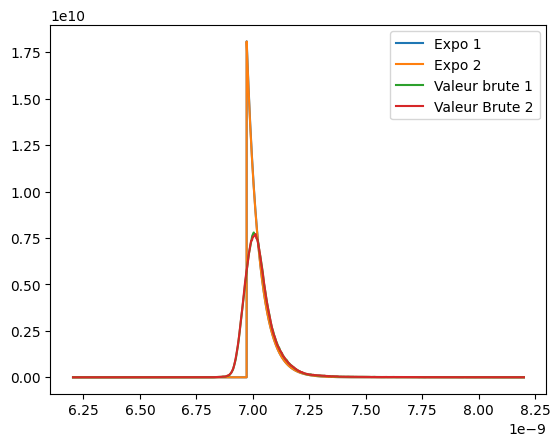

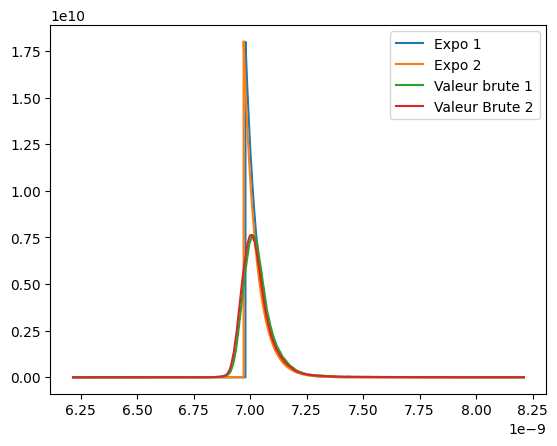

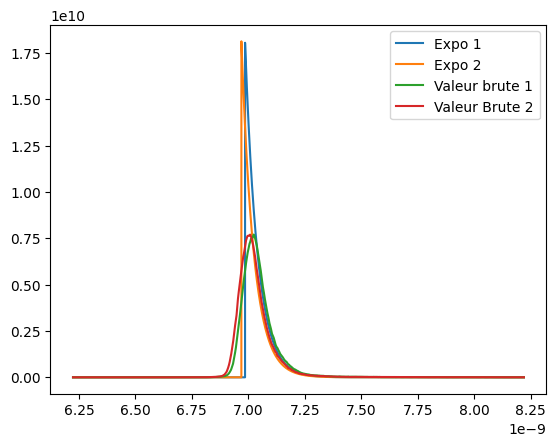

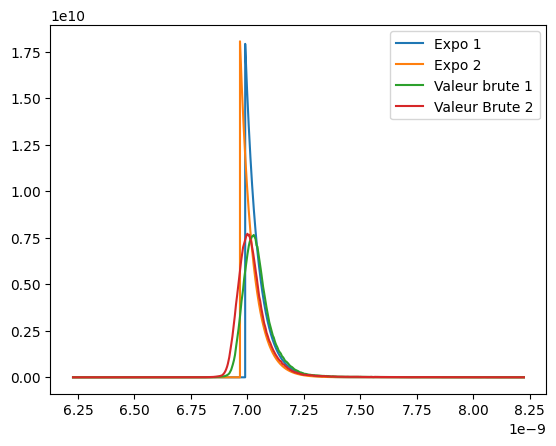

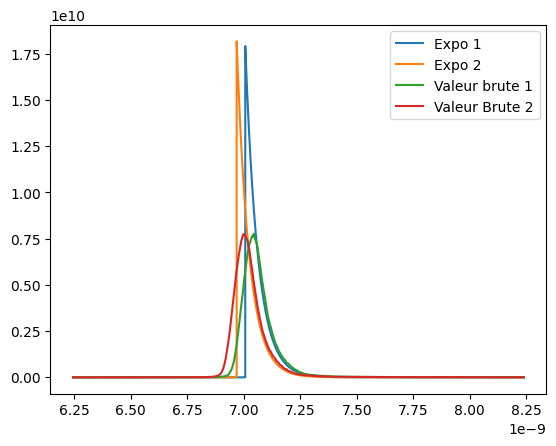

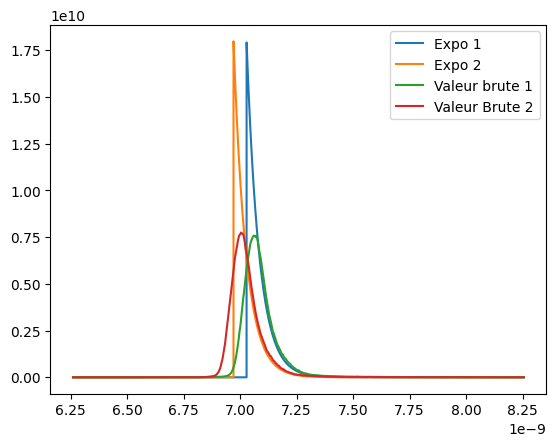

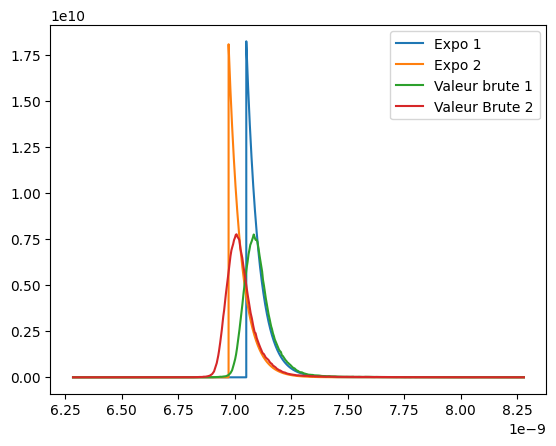

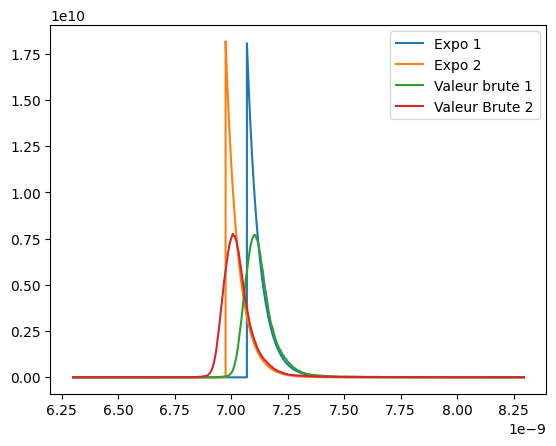

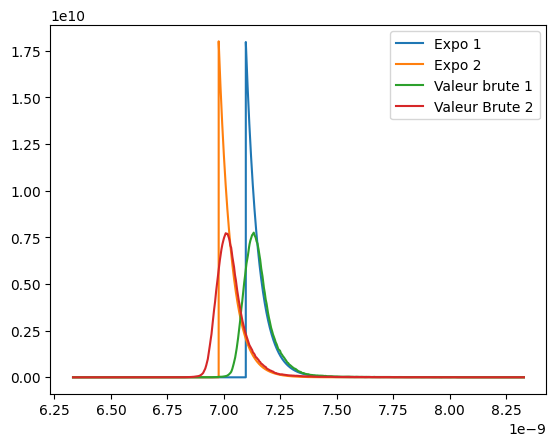

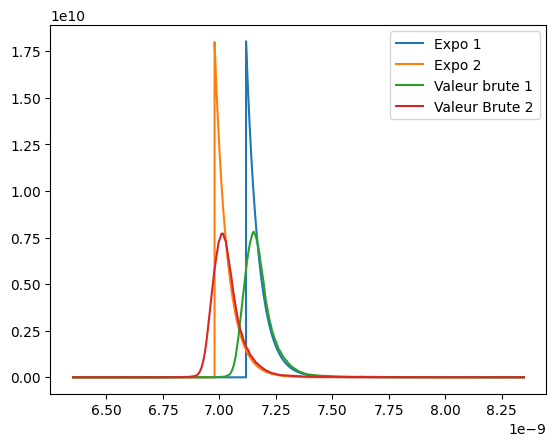

In [8]:
names = ['./acquired_data/xp_00/data.json','./acquired_data/xp_01/data.json','./acquired_data/xp_02/data.json','./acquired_data/xp_03/data.json','./acquired_data/xp_04/data.json','./acquired_data/xp_05/data.json','./acquired_data/xp_06/data.json','./acquired_data/xp_07/data.json','./acquired_data/xp_08/data.json','./acquired_data/xp_09/data.json']
g2 = 0.004
OArr = []
MsArr = []
DelArr = []
fWArr = []
for i in names:
    time, waves, delay, table, vHom, fullWaves = createWaves(i,doYouPlot = False,timeArray = 2 ** 14 + 1)
    Ms = (vHom + g2)/(1-g2)
    #print(i)
    #print(Ms)
    #print(delay/1e12)
    idx1 = np.argmax(waves[0])
    idx2 = np.argmax(waves[1])
    #print(np.abs(time[idx2]-time[idx1]))
    #print(Overlap(waves[0],waves[0],time))
    #print(Overlap(waves[1],waves[1],time))
    MsArr.append(Ms)
    OArr.append((Overlap(waves[0],waves[1],time)) ** 2)
    DelArr.append(delay)
    fWArr.append(Overlap(fullWaves[0],fullWaves[1],time))
    plt.figure()
    plt.plot(time,waves[0] ** 2,label = 'Expo 1')
    plt.plot(time,waves[1] ** 2,label = 'Expo 2')
    plt.plot(time,fullWaves[0],label = 'Valeur brute 1')
    plt.plot(time,fullWaves[1], label = 'Valeur Brute 2')
    plt.legend()

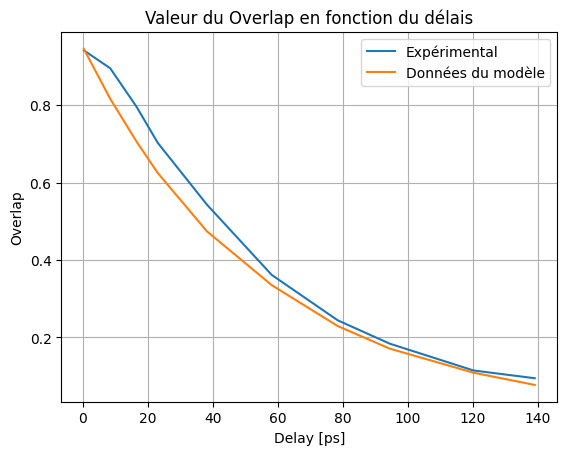

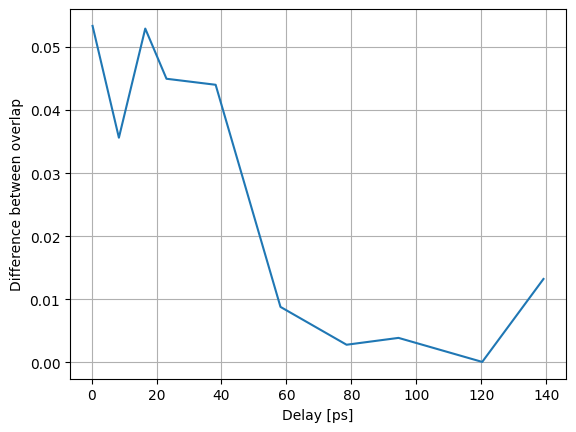

In [9]:

plt.plot(DelArr,MsArr,label = 'Expérimental')
plt.plot(DelArr,np.array(OArr)*0.95,label = 'Données du modèle')
#plt.plot(DelArr,fWArr,label = 'Exp avec Fit')
plt.xlabel('Delay [ps]')
plt.ylabel('Overlap')
plt.title(r'Valeur du Overlap en fonction du délais')
plt.grid()
plt.legend()

plt.figure()
plt.plot(DelArr,np.abs(np.array(MsArr)-np.array(OArr)))
plt.xlabel('Delay [ps]')
plt.ylabel('Difference between overlap')
plt.grid()


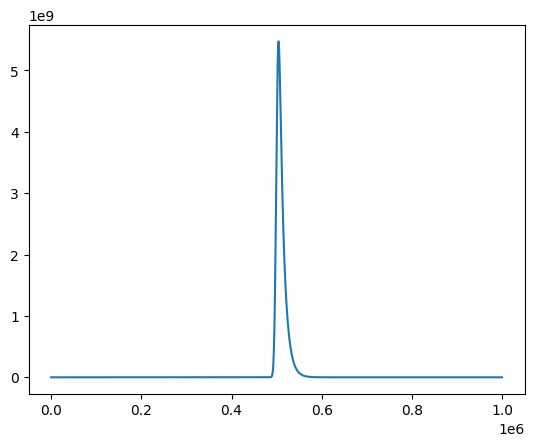

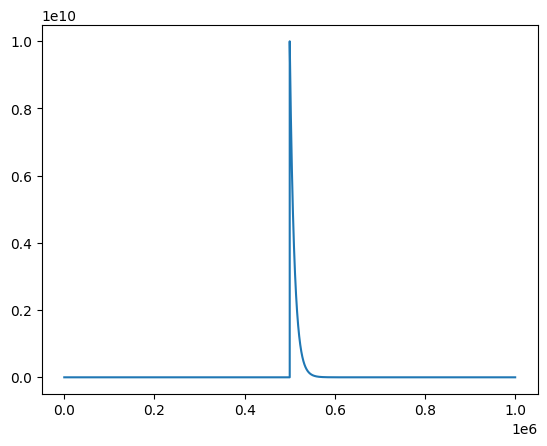

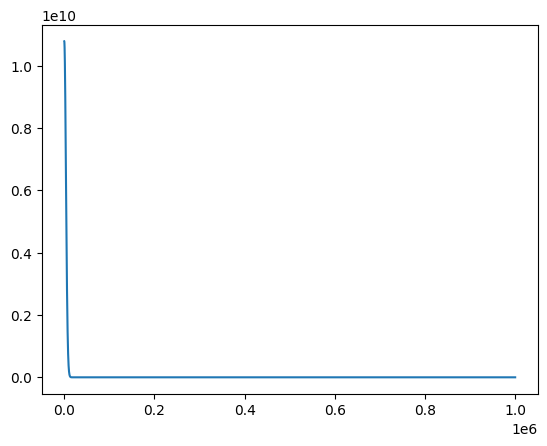

In [5]:
"""     f = 1/4 * np.exp(gam / 4 * ( gam * sig ** 2 - 4 * x + 4 * x0)) * gam / (np.sqrt(np.pi)*sig) * (
        sc.special.erfc((gam * sig **2 - 2*x + 2 * x0)/(2*sig))
    ) """
def photonFun(x,gam,x0,sig):
    #sig = 18e-12 + 9e-12 + 10e-12
    f =  1/2 * np.exp(gam / 2 * ( gam * sig ** 2 - 2 * x + 2 * x0)) * gam * (
        sc.special.erfc((gam * sig **2 - x + x0)/(np.sqrt(2)*sig))
    )

    #f /= np.sqrt(Overlap(f,f,x))
    #f /= sc.integrate.simps(f,x)
    #f /= np.max(np.abs(f))
    return f


x = np.linspace(0,1000e-11,1000000)
gam = 1e10
x0 = 5000e-12
sig = 37e-12

A = photonFun(x,gam,x0,sig)
B = (Exponential(x-x0,gam)) ** 2
C = (Gaussian(x,sig)) **2
plt.figure()
plt.plot(A)
plt.figure()
plt.plot(B)
plt.figure()
plt.plot(C)

In [6]:
fA = sc.integrate.simps(A,x)
fB = sc.integrate.simps(B,x)
fC = sc.integrate.simps(C,x)

print('A' ,fA)
print('B',fB)
print('C',fC)

A 1.0000000000000009
B 0.9999999995833284
C 0.49999999999967193


In [7]:
NormWaves0 = sc.integrate.simps(waves[0] ** 2,time)
NormFullWaves0 = sc.integrate.simps(fullWaves[0],time)
print(NormFullWaves0)
print(NormWaves0)

1.0000000000000002
0.9994622426527644


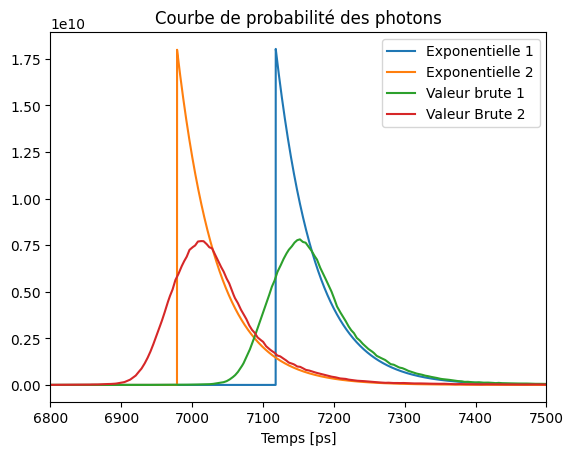

In [20]:
plt.figure()
timeps = time*1e12
plt.plot(timeps,waves[0] ** 2,label = 'Exponentielle 1')
plt.plot(timeps,waves[1] ** 2,label = 'Exponentielle 2')
plt.plot(timeps,fullWaves[0],label = 'Valeur brute 1')
plt.plot(timeps,fullWaves[1], label = 'Valeur Brute 2')
plt.xlabel(r'Temps [ps]')
plt.title('Courbe de probabilité des photons')
plt.xlim([6800,7500])
plt.legend()